In [1]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [2]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [37]:
def simulate_lorenz(s=10, r=28, b=2.667, x=(0., 1., 1.05)):
    dt = 0.01
    num_steps = 10000

    # Need one more for the initial values
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # Set initial values
    xs[0], ys[0], zs[0] = x

    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s=s,r=r,b=b)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs, ys, zs

In [38]:
def plot_lorenz(s=10, r=28, b=2.667, x=(0., 1., 1.05)):
    xs, ys, zs = simulate_lorenz(s=s,r=r,b=b,x=x)

    # Plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")

    plt.show()

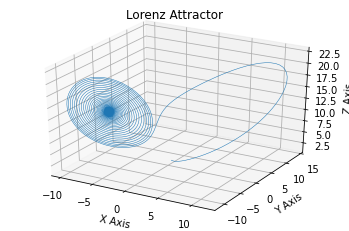

In [39]:
plot_lorenz(r=14, s=10, b=8.0/3)

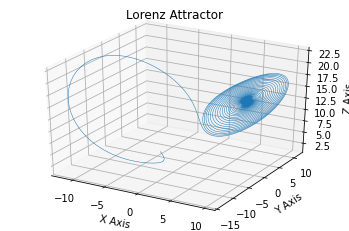

In [40]:
plot_lorenz(r=14, s=10, b=8.0/3, x=(-5., 1., 1.05))

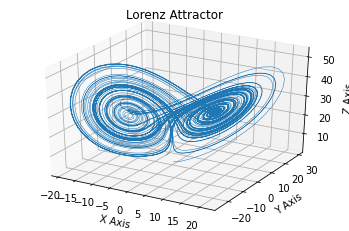

In [35]:
plot_lorenz(r=28, s=10, b=8.0/3)